# Exact algorithm for trees

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from modulus_tools.basic_algorithm import matrix_modulus, modulus
from modulus_tools.families.networkx_families import MinimumSpanningTree
import numpy as np
import cvxpy as cvx
from itertools import combinations
import random

In [2]:
def matrix(G):
    for i,(u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    n = len(G.nodes)
    N=[]
    for T in combinations(G.edges,n-1):
            H = nx.Graph(T)
            if nx.is_tree(H):   
                v = np.zeros(m)
                for (a,b) in T:
            
                    ind = G[a][b]['enum']
                    v[ind] = 1
                N.append(v)       
    return(np.array(N))

def modul(N,p,sigma):
    # number of rho variables
    n = N.shape[-1]
    # make sigma into a diagonal matrix
    S = np.diag(sigma)
    
    # set up optimization variables
    rho = cvx.Variable(n)
    
    # YOUR CODE HERE
    X= (S**(1./p)) @ rho
    obj = cvx.Minimize(cvx.pnorm(X,p)**p)
    cons = [rho>=0,N @ rho >=1 ]
    # solve the problem
    prob = cvx.Problem(obj,cons)
    prob.solve(solver='ECOS')
    return  np.array(obj.value).flatten(), np.array(rho.value).flatten()

In [3]:
p=2
N = np.array([[1 , 1, 1, 0, 0],[1,0,0,1,1],[0,1,1,1,0]])
sigma = [2, 3, 4, 5, 1]
sigmaD = [1/a for a in sigma]
ND = np.ones(N.shape)-N
print(N)
print(ND)
print(sigma)
print(sigmaD)
mod,rho = modul(N,p,sigma)
eta = [a * b for a, b in zip(rho, sigma)]/mod
print(np.round(eta,2))
modD,rhoD = modul(ND,p,sigmaD)
etaD = [a * b for a, b in zip(rhoD, sigmaD)]/modD
print(np.round(etaD,2))

[[1 1 1 0 0]
 [1 0 0 1 1]
 [0 1 1 1 0]]
[[0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]
[2, 3, 4, 5, 1]
[0.5, 0.3333333333333333, 0.25, 0.2, 1.0]
[0.36 0.74 0.74 0.9  0.26]
[0.53 0.26 0.26 0.21 0.74]


In [4]:
p=2
N = np.array([[1 , 1, 1, 0, 0],[1,0,0,1,1],[0,1,1,1,0]])
sigma = [1, 3, 4, 5, 1]
sigmaD = [1/a for a in sigma]
ND = np.ones(N.shape)-N
print(N)
print(ND)
print(sigma)
print(sigmaD)
mod,rho = modul(N,p,sigma)
eta = [a * b for a, b in zip(rho, sigma)]/mod
etasi = rho/mod
print(np.round(etasi,2))
modD,rhoD = modul(ND,p,sigmaD)
etaD = [a * b for a, b in zip(rhoD, sigmaD)]/modD
etasiD = rhoD/modD
print(np.round(etasiD,2))

[[1 1 1 0 0]
 [1 0 0 1 1]
 [0 1 1 1 0]]
[[0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]
[1, 3, 4, 5, 1]
[1.0, 0.3333333333333333, 0.25, 0.2, 1.0]
[0.23 0.26 0.19 0.2  0.23]
[0.66 0.62 0.83 0.66 0.79]


In [5]:
p=2
N = np.array([[1 , 1, 1, 0, 0,1],[1,0,0,1,1,1],[0,1,1,1,0,1]])
sigma = [1,2,1,5,1,1]
sigmaD = [1/a for a in sigma]
ND = np.ones(N.shape)-N
print(N)
print(ND)
print(sigma)
print(sigmaD)
mod,rho = modul(N,p,sigma)
eta = [a * b for a, b in zip(rho, sigma)]/mod
print(np.round(eta,2))
modD,rhoD = modul(ND,p,sigma)
etaD = [a * b for a, b in zip(rhoD, sigma)]/modD
print(np.round(etaD,2))

[[1 1 1 0 0 1]
 [1 0 0 1 1 1]
 [0 1 1 1 0 1]]
[[0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]]
[1, 2, 1, 5, 1, 1]
[1.0, 0.5, 1.0, 0.2, 1.0, 1.0]
[0.43 0.57 0.57 1.   0.43 1.  ]
[0.09 0.44 0.44 0.47 0.56 0.  ]


[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


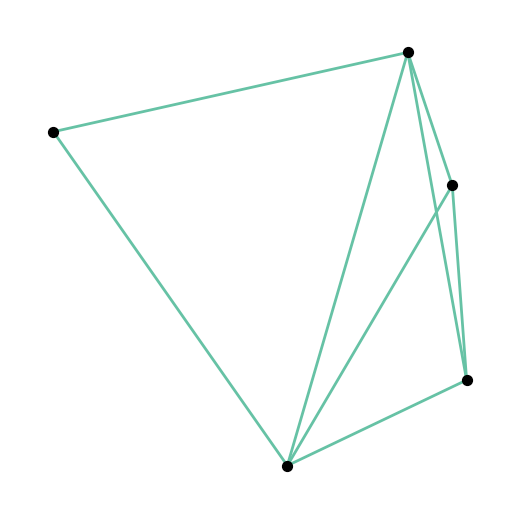

In [6]:
'Basic algorithm'
G = nx.random_geometric_graph(5, 0.8, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
m = len(G.edges())
mst = MinimumSpanningTree(G)
mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
plt.savefig("Graph.PDF", format="PDF")
print(rho/mod)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


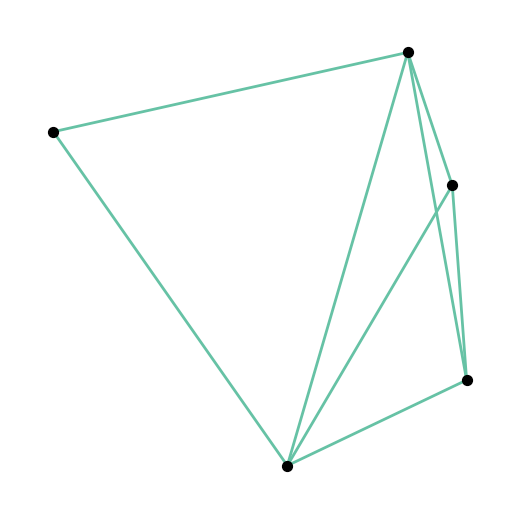

In [7]:
'Exact algorithm'
G = nx.random_geometric_graph(5, 0.8, seed=3810312)
pos = {v:d['pos'] for v,d in G.nodes(data=True)}
m = len(G.edges())
matrix(G)
mod,rho= modul(matrix(G),2,np.ones(m))
eta = np.round(rho/mod,3)
print(eta)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=eta, edge_cmap=plt.cm.Set2)
plt.savefig("Graph.PDF", format="PDF")



In [8]:

H= nx.random_geometric_graph(6, 0.8, seed=3810312)
ng = len(H.nodes())

G0 = nx.random_geometric_graph(7, 0.8, seed=3810312)
ng0= len(G0.nodes())
mapping = dict(zip(G0, range(0,ng0 )))
G0 = nx.relabel_nodes(G0, mapping)


G1 = nx.random_geometric_graph(8, 0.8, seed=3810312)
ng1= len(G1.nodes())
mapping = dict(zip(G1, range(ng0,ng0+ng1 )))
G1 = nx.relabel_nodes(G1, mapping)



G2 = nx.random_geometric_graph(9, 0.8, seed=3810312)
ng2= len(G2.nodes())
mapping = dict(zip(G2, range(ng0+ng1,ng0+ng1+ng2 )))
G2 = nx.relabel_nodes(G2, mapping)



G3 = nx.random_geometric_graph(10, 0.8, seed=3810312)
ng3= len(G3.nodes())
mapping = dict(zip(G3, range(ng0+ng1+ng2,ng0+ng1+ng2+ng3 )))
G3 = nx.relabel_nodes(G3, mapping)


G4 = nx.random_geometric_graph(11, 0.8, seed=3810312)
ng4= len(G4.nodes())
mapping = dict(zip(G4, range(ng0+ng1+ng2+ng3,ng0+ng1+ng2+ng3+ng4 )))
G4 = nx.relabel_nodes(G4, mapping)


G5 = nx.random_geometric_graph(12, 0.8, seed=3810312)
ng5= len(G5.nodes())
mapping = dict(zip(G5, range(ng0+ng1+ng2+ng3+ng4,ng0+ng1+ng2+ng3+ng4+ng5 )))
G5 = nx.relabel_nodes(G5, mapping)

L = [G0,G1,G2,G3,G4,G5]
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
            G.add_edge(x, y)            
for (u,v) in H.edges():
    m=random.choice(list(L[u].nodes()))
    n=random.choice(list(L[v].nodes()))
    G.add_edge(m, n)
    


57
214
[0.02434961 0.02438261 0.02436993 0.02438794 0.02436253 0.02438052
 0.02436451 0.02436504 0.02435436 0.02436514 0.02496952 0.02503224
 0.02498523 0.02434347 0.02435815 0.02436843 0.0243688  0.02496856
 0.02436935 0.02438377 0.02498079 0.02052156 0.02053143 0.02051682
 0.02051434 0.02050738 0.02051307 0.02496623 0.02501178 0.02052599
 0.02052614 0.02050515 0.02050657 0.02165596 0.02049901 0.0205169
 0.02051647 0.02052385 0.0205276  0.02167349 0.02051953 0.0205557
 0.02164958 0.02053048 0.02051618 0.02501276 0.02498546 0.01730928
 0.01732522 0.01730399 0.01732513 0.01733469 0.01730466 0.01733007
 0.01732584 0.01732923 0.01729621 0.01734578 0.01736882 0.01734175
 0.0173404  0.01730472 0.0173116  0.01731059 0.01732007 0.01732182
 0.01737266 0.01732961 0.01731108 0.02498292 0.01732464 0.0173452
 0.01733531 0.01731187 0.02499095 0.01736437 0.01731452 0.01733059
 0.01734252 0.01719928 0.01717468 0.01720562 0.01720377 0.01717474
 0.01717496 0.0171828  0.01719793 0.01718108 0.01717389 0.

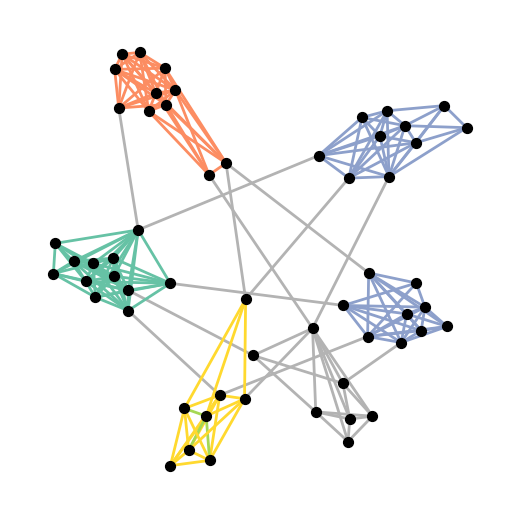

In [9]:
pos = nx.spring_layout(G,seed = 123)
m = len(G.edges())
mst = MinimumSpanningTree(G)
mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
plt.savefig("Graph.PDF", format="PDF")
print(len(G.nodes))
print(len(G.edges))
print(rho)

In [10]:
def deflation(H,L):
    ng = len(H.nodes())
    ne = []
    nr = [0]
    for u in range(ng):
        ne.append(len(L[u].nodes()))
    for u in range(ng): 
        nr.append( sum(ne[:(u+1)]))
    for u in range(ng): 
        mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
        L[u] = nx.relabel_nodes(L[u], mapping)  
    G= nx.Graph()
    for u in range(ng):
        for (x,y) in L[u].edges():
            G.add_edge(x, y)            
    for (u,v) in H.edges():
        m=random.choice(list(L[u].nodes()))
        s=random.choice(list(L[v].nodes()))
        G.add_edge(m, s)

    return G

def MODD(G):
    pos = nx.spring_layout(G,seed = 123)
    m = len(G.edges())
    mst = MinimumSpanningTree(G)
    mod, cons, rho, lam = modulus(m, matrix_modulus, mst, max_iter=400)
    plt.figure(figsize=(5,5))
    nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)
    return rho,mod

6


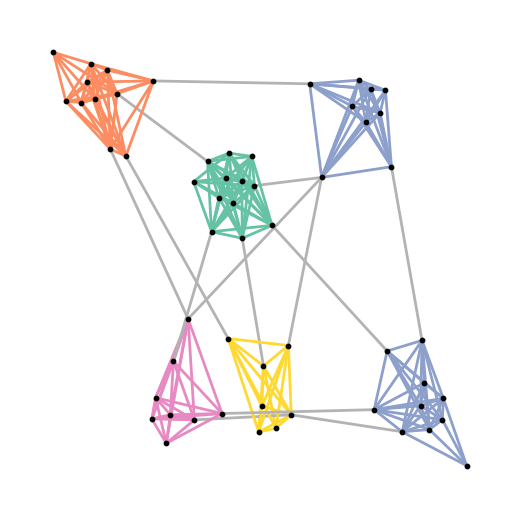

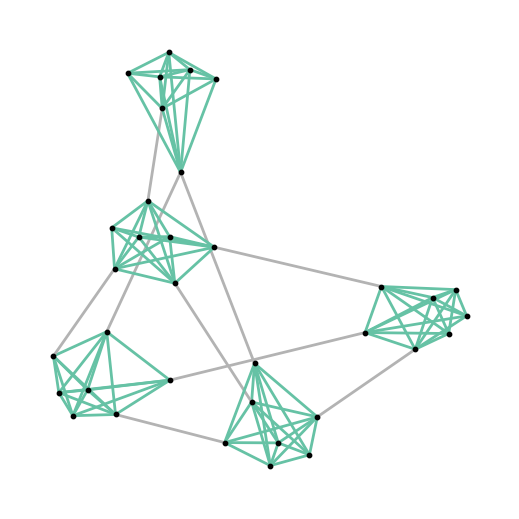

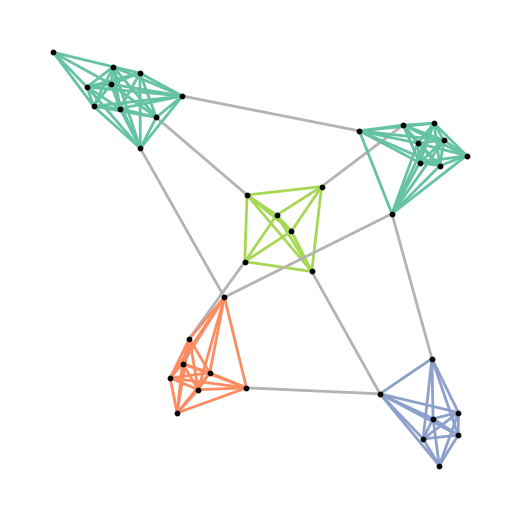

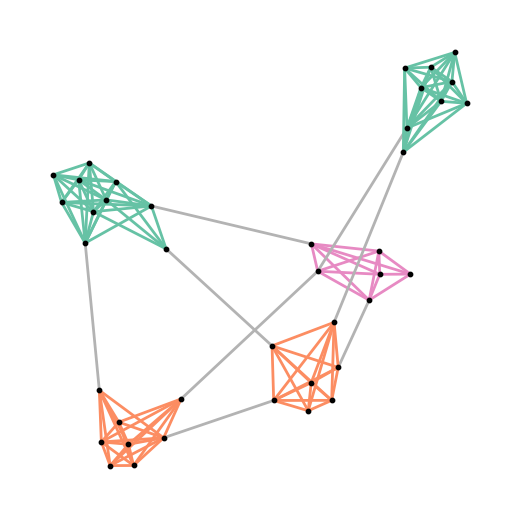

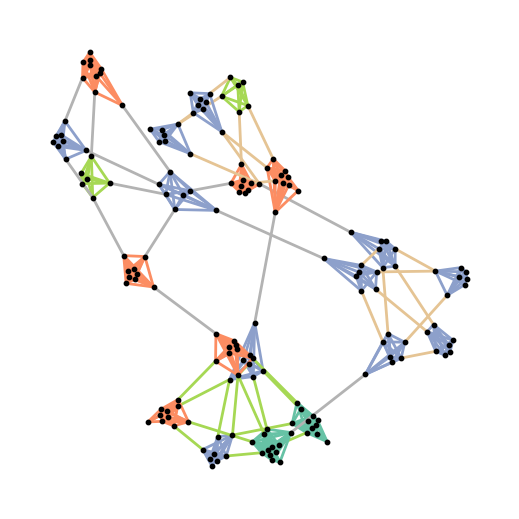

In [11]:
n=6
H= nx.random_geometric_graph(n, 0.85, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G1 = deflation(H,L)
rho,mod=MODD(G1)

n=5
H= nx.random_geometric_graph(n, 0.9, seed=3810312 )
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+2, 0.9, seed=3810312)
    L.append(M)
G2 = deflation(H,L)
rho,mod=MODD(G2)

n=5
H= nx.random_geometric_graph(n,0.9, seed=381)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G3 = deflation(H,L)
rho,mod=MODD(G3)

n=5
H= nx.random_geometric_graph(n,0.8, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G4 = deflation(H,L)
rho,mod=MODD(G4)

n=4
H= nx.random_geometric_graph(n, 0.9, seed=3810312)
print(len(H.edges()))
L=[G1,G2,G3,G4]
G = deflation(H,L)
rho,mod=MODD(G)

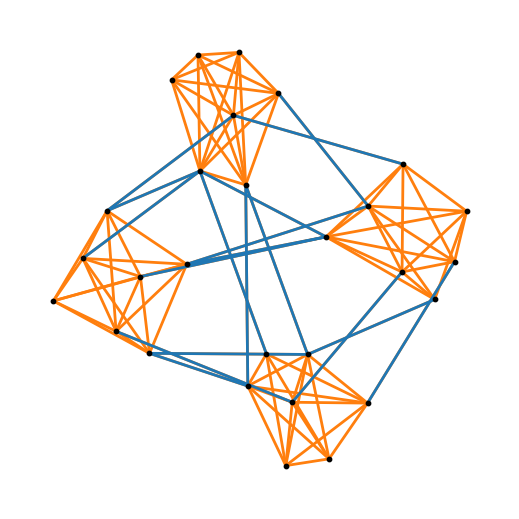

In [12]:
n=4
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+3, 0.9)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(3):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G,seed = 123)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

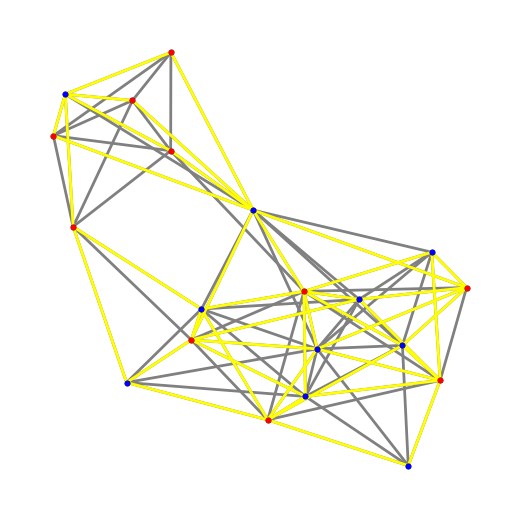

In [13]:
G= nx.random_geometric_graph(20,0.5, seed=3810312)
ed =[]
edge = []
for (u,v) in G.edges():
    for i in range(2):
        if u in range(i*10,i*10+10) and v in range(i*10,i*10+10):
             ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)

pos = nx.spring_layout(G,seed = 123)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='yellow')
nx.draw_networkx_nodes(G, pos,node_size=10, nodelist=range(10), node_color='red')
nx.draw_networkx_nodes(G, pos,node_size=10, nodelist=range(10,20), node_color='blue')
plt.savefig("partiiton.PDF", format="PDF")

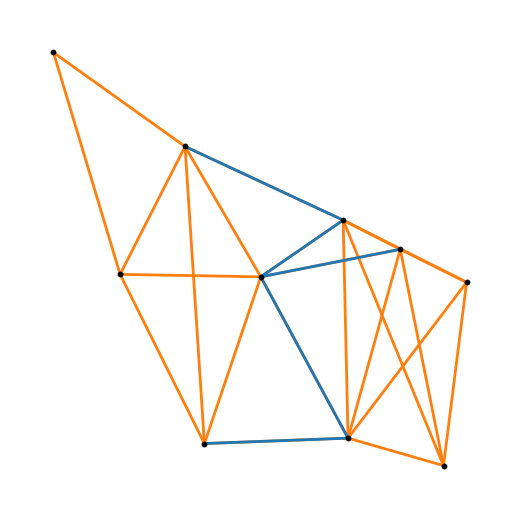

In [14]:
n=2
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+3, 0.9)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(5):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G,seed = 123)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

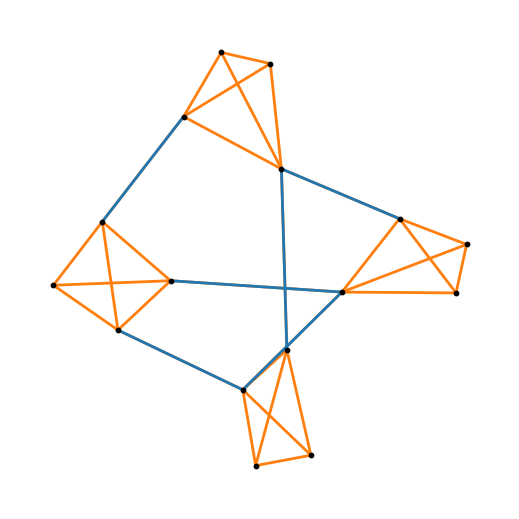

In [15]:

n=4
H= nx.complete_graph(n)
L=[]
for u in range(n):
    M = nx.complete_graph(n)
    L.append(M)  
ng = len(H.nodes())
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
for i in range(1):
    for (u,v) in H.edges():
        k=random.choice(list(L[u].nodes()))
        l=random.choice(list(L[v].nodes()))
        G.add_edge(k, l)       
pos = nx.spring_layout(G)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partition2.PDF", format="PDF")

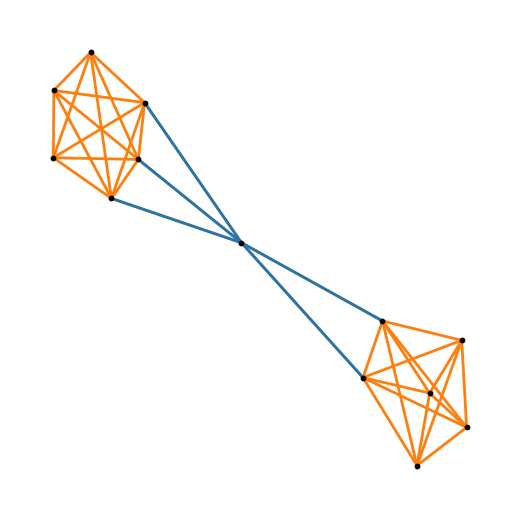

In [16]:
n=2
L=[]
for u in range(n):
    M = nx.complete_graph(6)
    L.append(M)
ng = n
ne = []
nr = [0]
for u in range(ng):
    ne.append(len(L[u].nodes()))
for u in range(ng): 
    nr.append( sum(ne[:(u+1)]))
for u in range(ng): 
    mapping = dict(zip(L[u], range(nr[u],nr[u+1])))
    L[u] = nx.relabel_nodes(L[u], mapping)  
G= nx.Graph()
for u in range(ng):
    for (x,y) in L[u].edges():
        G.add_edge(x, y) 
        
for u in range(3):
        k=random.choice(list(L[0].nodes()))
        G.add_edge(k, 100) 
for u in range(4):
        k=random.choice(list(L[1].nodes()))
        G.add_edge(k, 100) 
pos = nx.spring_layout(G)
ed = []
edge = []
for (u,v) in G.edges():
    for x in range(n):
        if (u,v) in L[x].edges():
            ed.append((u,v))
for e in G.edges():
    if e not in ed:
        edge.append(e)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color='tab:orange')
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='tab:blue')
plt.savefig("partiiton.PDF", format="PDF")

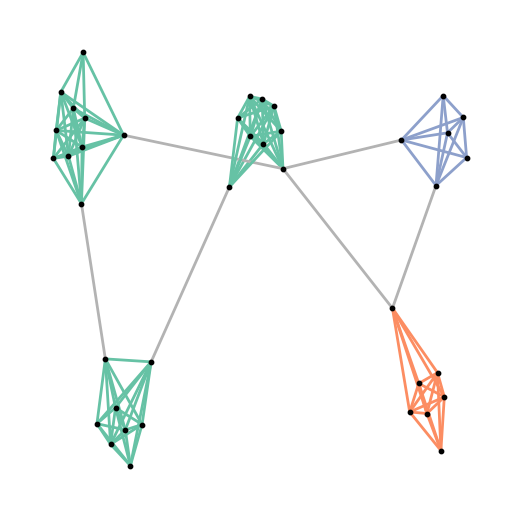

In [17]:
n=5
H= nx.random_geometric_graph(n,  0.7, seed=381)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G7 = deflation(H,L)
rho,mod=MODD(G7)

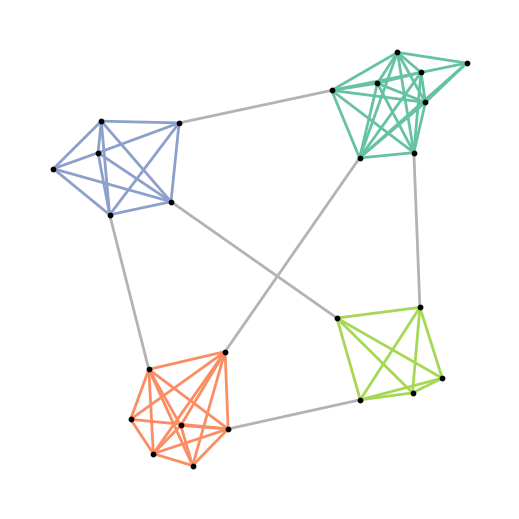

In [18]:
n=4
H= nx.random_geometric_graph(n,0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9,seed= u)
    L.append(M)
G4 = deflation(H,L)
rho,mod=MODD(G4)
plt.savefig("par1.PDF", format="PDF")

0.7505159705040769


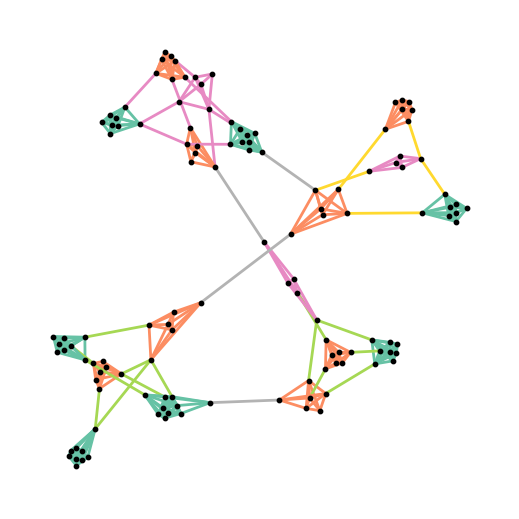

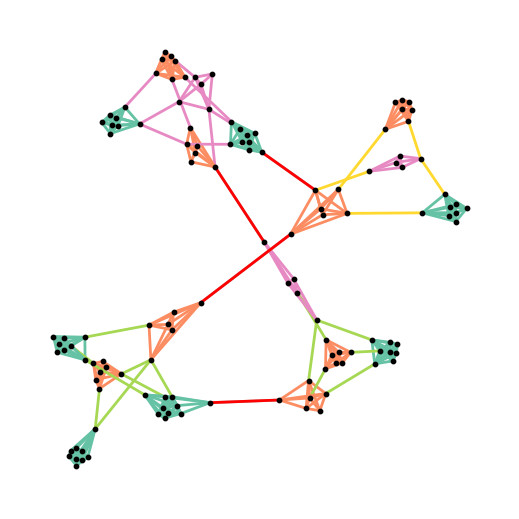

In [19]:

n=4
H= nx.random_geometric_graph(n, 0.9, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(5+u, 0.9, seed=3810312)
    L.append(M)
G1 = deflation(H,L)

n=5
H= nx.random_geometric_graph(n, 0.9, seed=3810312 )
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u, 0.9, seed=3810312)
    L.append(M)
G2 = deflation(H,L)

n=4
H= nx.random_geometric_graph(n,0.9, seed=3)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G3 = deflation(H,L)

n=5
H= nx.random_geometric_graph(n,0.8, seed=3810312)
L=[]
for u in range(n):
    M = nx.random_geometric_graph(n+u+1, 0.9, seed=3810312)
    L.append(M)
G4 = deflation(H,L)

n=4

H= nx.Graph()
H.add_edges_from([(0,1),(1,2),(2,3),(3,0)])
L=[G1,G2,G3,G4]
G = deflation(H,L)
rho,mod=MODD(G)
plt.figure(figsize=(5,5))

eta = rho/mod
maxi = max(eta)
print(maxi)
edge= []

for (u,v) in G.edges():
    l = G[u][v]['enum']
    if abs(maxi - eta[l]) < 1e-2:
        edge.append((u,v))

pos = nx.spring_layout(G,seed = 123)
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)        
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='red')
plt.savefig("par2.PDF", format="PDF")


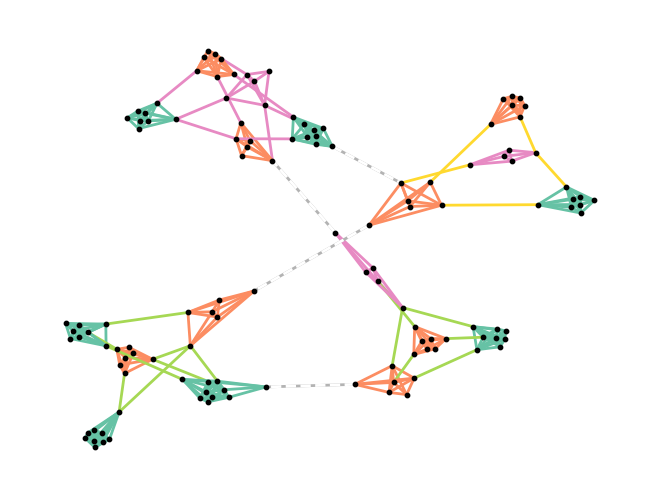

In [20]:
pos = nx.spring_layout(G,seed = 123)
nx.draw(G, pos, node_size=10, node_color='black', width=2, edge_color=rho, edge_cmap=plt.cm.Set2)        
nx.draw_networkx_edges(G, pos, edgelist=edge, width=2, edge_color='white',style='dashed')
plt.savefig("par3.PDF", format="PDF")

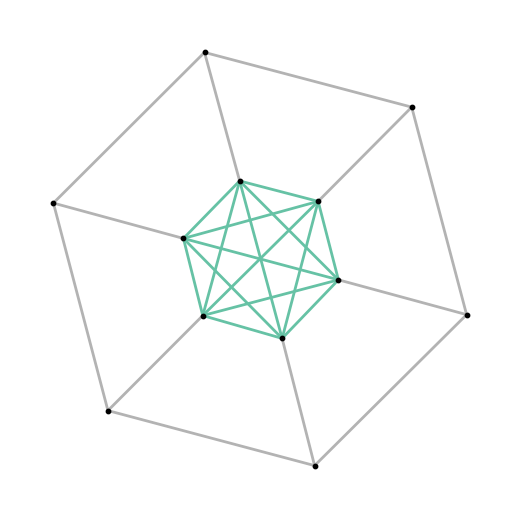

In [21]:
P = nx.complete_graph(6)
for u in range(6):
    P.add_edge(u,u+6)
nx.add_path(P,[6,7,8,9,10,11,6])
rho,mod=MODD(P)
plt.savefig("densest.PDF", format="PDF")

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from modulus_tools import demo_graphs
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
import random




In [23]:
G = nx.complete_graph(6)

[((0, 1), (0, 2), (0, 3), (0, 4), (0, 5))]


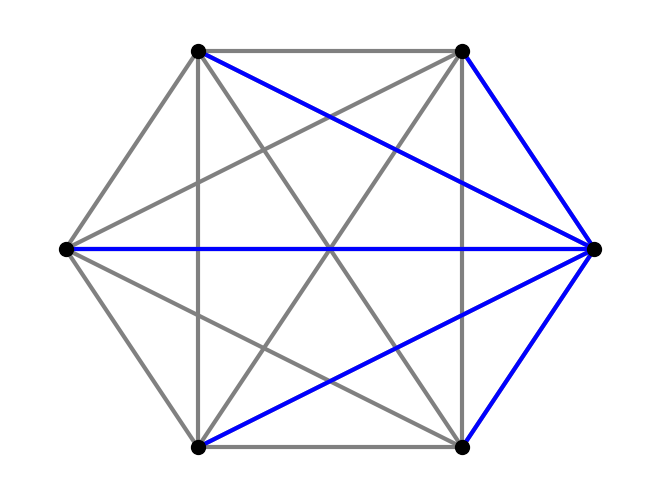

In [24]:
trees = list(alg.spanning_trees(G))
edd = []
dt = []
for tree in trees:
    disjoint = True
    for u in tree:
        if u in edd:
            disjoint = False
    if disjoint is True:
        dt.append(tree)
        for u in tree:
            edd.append(u)
print(dt)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_size=100, node_color='black', width=3,edge_color='gray')
for u in range(len(dt)):
    edges = dt[u]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color= 'blue')


[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


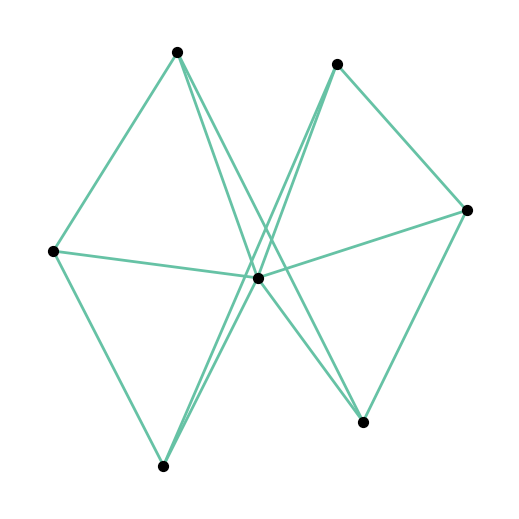

In [25]:
G = nx.Graph()
nx.add_path(G,['a0','a1','a2','a3','a4','a5','a0'])

G.add_edge('a0','u')
G.add_edge('a1','u')
G.add_edge('a2','u')
G.add_edge('a3','u')
G.add_edge('a4','u')
G.add_edge('a5','u')

pos = nx.spring_layout(G)
m = len(G.edges())
matrix(G)
mod,rho= modul(matrix(G),2,np.ones(m))
eta = np.round(rho/mod,3)
print(eta)
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=50, node_color='black', width=2, edge_color=eta, edge_cmap=plt.cm.Set2)